# Ch2: Distributions

http://thinkstats2.com

Copyright 2016 Allen B. Downey

MIT License: https://opensource.org/licenses/MIT


In [1]:
from __future__ import print_function, division

import pandas as pd

import numpy as np

pd.set_option('display.max_columns', 300)
pd.set_option('precision', 2)
pd.set_option('display.float_format', lambda x: '%.2f' % x)

import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import rcParams
rcParams['figure.figsize'] = 10,8
import seaborn as sb
sb.set_style('white') 

import nsfg
import first

Given a list of values, let us count frequency of each value.

We can do this either by creating a disctionary of frequencies, or by using `Counter`.

Using __Python dictionary__:

In [3]:
t = [1, 2, 2, 3, 5]

hist = {} # Create empty dict that will hold the elements of t and their respective frequencies 

for x in t:
    hist[x] = hist.get(x, 0)+1 # To key x in hist, assing value 0 if the key isn't found, or add 1 to current key
hist

{1: 1, 2: 2, 3: 1, 5: 1}

Using a __`Counter`__

In [4]:
from collections import Counter
counter = Counter(t)
counter

Counter({1: 1, 2: 2, 3: 1, 5: 1})

Iterating over items in a dictionary

In [8]:
for val, freq in hist.items():
     print(val, freq)

1 1
2 2
3 1
5 1


Load the data from the pregnancy file and select the records for live births.

In [2]:
preg = nsfg.ReadFemPreg()
live = preg[preg.outcome == 1]

### Histograms

 Histograms are complete descriptions of the distribution of a sample;
 
- central tendency: Do the values tend to cluster around a particular point?
- modes: Is there more than one cluster?
- spread: How much variability is there in the values?
- tails: How quickly do the probabilities drop off as we move away from the modes?
- outliers: Are there extreme values far from the modes?

In [5]:
ages = np.floor(live['agepreg'])

Text(0, 0.5, 'Count')

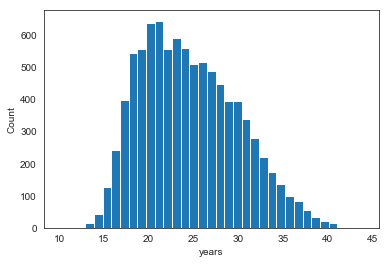

In [6]:
plt.hist(ages, bins=35, label='agepreg')
# hist = thinkstats2.Hist(ages, label='agepreg')
# thinkplot.Hist(hist)
plt.xlabel('years')
plt.ylabel('Count')

This is the histogram of agepreg, the mother's age at the end of pregnancy. The mode is 21 years. The distribution is very roughly bell- shaped, but in this case the tail extends farther to the right than left; most mothers are in their 20s, fewer in their 30s.

From live births, we can select first babies and others using `birthord`, then compute histograms of pregnancy length for the two groups.

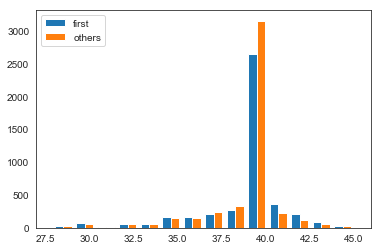

In [23]:
firsts = live[live['birthord'] == 1]
others = live[live['birthord'] != 1]

plt.hist([firsts['prglngth'], others['prglngth']], label=['first', 'others'], bins = np.linspace(-27, 45, 60))#width=0.45)#, align='right', width = 0.45)
# plt.hist(others['prglngth'], label='other', align='left', width=0.45)
plt.xlim([27,46])
plt.legend(loc='upper left')
plt.show();

`Series` provides methods to compute summary statistics:

In [50]:
mean = live['prglngth'].mean()
var = live['prglngth'].var()
std = live['prglngth'].std()

print("Avg pregnany length is {0:.2f}, std is {1:.2f} and variance is {2:.2f}".format(mean, std, var))
#       [round(x) for x in [mean, std, var]]))

Avg pregnany length is 38.56, std is 2.70 and variance is 7.30


### Effect sizes 

A summary statistic describing the size of an effect, like a difference between the means of two groups

. Here's are the mean pregnancy lengths for first babies and others:

In [53]:
round(firsts.prglngth.mean(),2), round(others.prglngth.mean(),2)

(38.6, 38.52)

The difference (in weeks) is:

In [54]:
firsts.prglngth.mean() - others.prglngth.mean()

0.07803726677754952

In [26]:
firsts.prglngth.mean() - others.prglngth.mean()

0.07803726677754952

The __Cohen effect size__ is a summary statistic that compares the difference in means expressed in number of standard deviations:

$$ d = \frac{ \bar{x_1} - \bar{x_2}}{s}$$

where $\bar{x_1}$ and $\bar{x_2}$ are the means of the two groups, and s is the pooled standard deviation

In [55]:
def CohenEffectSize(group1, group2):
    """Computes Cohen's effect size for two groups.
    
    group1: Series or DataFrame
    group2: Series or DataFrame
    
    returns: float if the arguments are Series;
             Series if the arguments are DataFrames
    """
    diff = group1.mean() - group2.mean()

    var1 = group1.var()
    var2 = group2.var()
    n1, n2 = len(group1), len(group2)

    pooled_var = (n1 * var1 + n2 * var2) / (n1 + n2)
    d = diff / np.sqrt(pooled_var)
    return d

Compute the Cohen effect size for the difference in pregnancy length for first babies and others.

In [56]:
CohenEffectSize(firsts['prglngth'], others['prglngth'])

0.028879044654449883

The difference in means is 0.029 standard deviations, which is small. To put that in perspective, the difference in height between men and women is about 1.7 standard deviations.

| Effect size	| d |
|--|--|
|Very small| 0.01 |
|Small | 0.20 |
|Medium|0.50|
|Large|0.80|
|Very large|1.20|
|Huge|2.0|

